In [1]:
import cPickle as pickle
from matplotlib import pyplot as plt
import os

all_images = pickle.load(open('input_output/all_images.pi', 'rb'))

print all_images.shape

(100, 540, 960, 3)


In [14]:
import numpy as np
gray_scale = np.mean(all_images, axis = -1)
back_ground = np.median(gray_scale, axis = 0)

In [15]:
from matplotlib import pyplot as plt
plt.imshow(back_ground, cmap = plt.get_cmap('gray'))
plt.show()

In [16]:
plt.imshow(gray_scale[80] - back_ground, cmap = plt.get_cmap('gray'))
plt.show()

In [17]:
bandwidth = np.percentile(gray_scale, 80, axis = 0) - np.percentile(gray_scale, 20, axis = 0)

In [18]:
example = np.copy(gray_scale[10]) - back_ground

plt.imshow(example, cmap = plt.get_cmap('gray'))
plt.show()

In [19]:
# %load segmentation/visualization.py
'''
Created on Apr 23, 2015

    Visualization tools

@author: Francois
'''

import matplotlib.pyplot as plt

def plot_contours(pict, labels, N_REGIONS):
    plt.figure(figsize=(5, 5))
    plt.imshow(pict, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours = 1,
                    colors=[plt.cm.spectral(l / float(N_REGIONS)), ])
    plt.xticks(())
    plt.yticks(())
    plt.title('Segmented image')
    plt.show()

In [20]:
def down_sample(pict):
    return pict[::2,::2] + pict[1::2,::2] + pict[::2,1::2] + pict[1::2,1::2]

In [21]:
# plot_contours(ds_example, labels, N_REGIONS)

NameError: name 'ds_example' is not defined

In [22]:
import cPickle as pickle

interesting_frames = [47, 49, 52, 55, 80]
output_folder = 'processed_imgs/'

for fr in interesting_frames:
    seg         = gray_scale[fr] - back_ground
    original    = all_images[fr]
    to_dump     = {'seg' : seg, 'original' : original}
    pickle.dump(to_dump, open('%sseg_example_%d.pi' % (output_folder, fr), 'wb'))

(540, 960)


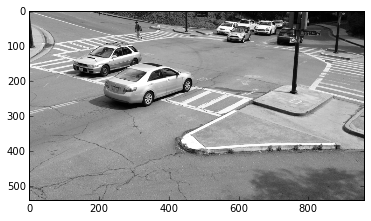

In [29]:
% matplotlib inline
import matplotlib.cm as cm
print gray_scale[47].shape
plt.imshow(gray_scale[47], cmap = cm.Greys_r)